<a href="https://colab.research.google.com/github/JibbyGeorge-DB/HuggingFace/blob/main/HuggingFace_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install or Upgrade transformers

In [1]:
!pip install transformers

I have connected to T4 instance, lets check the GPU with nvidia-smi

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Thu Jan  8 09:36:01 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Connecting to Hugguing Face. I have added the HF key in the colab secrets as HF_TOKEN

In [5]:
from huggingface_hub import login
from google.colab import userdata

hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

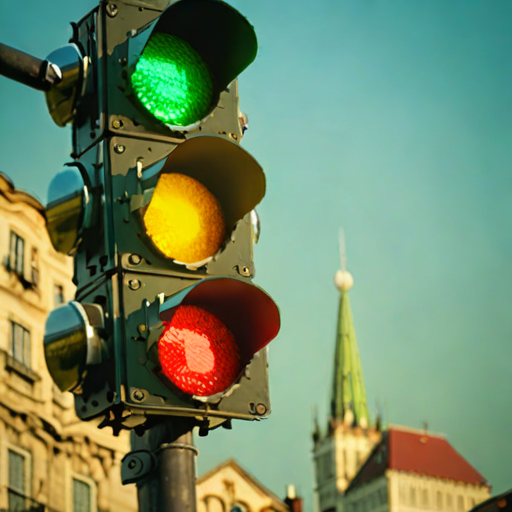

In [10]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo",torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "Vehicles stopped in a traffic light"
image = pipe(prompt=prompt, num_inference_step=4, guidance_scale=0.0).images[0]
display(image)


In [11]:
# Restart the kernel

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
from diffusers import DiffusionPipeline
import torch

base = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True)
base.to("cuda")
prompt = "Vehicles stopped in a traffic light"
image = base(prompt=prompt, num_inference_step=4, guidance_scale=0.0).images[0]
display(image)

In [3]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [5]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import base64
import os
import io
import IPython.display


# Load the Stable Diffusion pipeline
get_completion = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

def TTI(prompt):
    output = get_completion(prompt)
    image = output.images[0]
    image = image.resize((512, 512))
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return IPython.display.HTML(f'<img src="data:image/png;base64,{img_str}"/>')


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


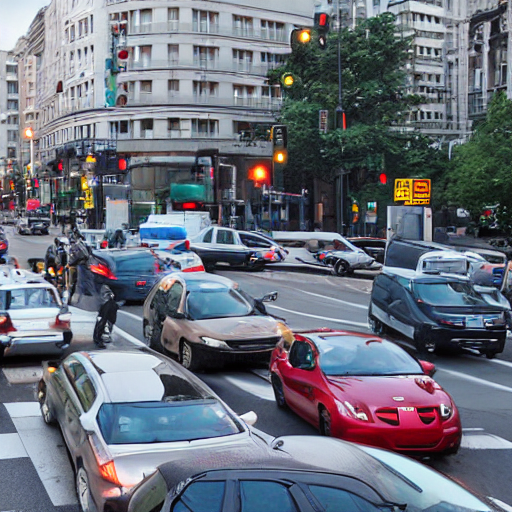

In [6]:
prompt ="Vehicles stopped in a traffic light"
result = TTI(prompt)
result